# Dino or Dragon?

## Dataset

In this homework, we'll build a mdoel for predicting if we have an image of a dino or a dragon. For this, we'll use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon).

We can get a wget-able version [here](https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip):

```bash
wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip
```

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch.

**Note:** We will need an environment with a GPU for this howework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp). We can also use a computer without a GPU, but it will be slower.

## Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons.

The dataset contains separate folders for training and validation.

### Model

For this homework we'll use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

We need to develop the model with following structure:

- The shape for input should be (`150, 150, 3`)
- Next, create a convolutional layer [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/):
    - Use 32 filters
    - Kernel size should be (`3, 3`) (that's the size of the filter)
    - Use `relu` as activation
- Reduce the size of the feature map with max pooling [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/)
    - Set the pooling size to (`2, 2`)
- Turn the multi-dimensional result into vectors using a [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) layer
- Next, add a `Dense` layer with 64 neurons and `relu` activation
- Finally, create the `Dense` layer with 1 neuron - this will be the output:
    - The output layer should have an activation - use the appropriate activation for the binary classification case
    
As optimizer use [SGD](https://keras.io/api/optimizers/sgd/) with the following parameters:
    - `SGD(lr=0.002, momentum=0.8)`
For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [1]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
# Define expected input shape
inputs = keras.layers.Input(shape=(150,150,3))
# Convoluational layer
x= keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
# Max pool layer
x = keras.layers.MaxPool2D(pool_size=2)(x)
# Flatten layer
x = keras.layers.Flatten()(x)
# First dense layer
x = keras.layers.Dense(64, activation='relu')(x)
# Second dense layer for output
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

# Create model
model = keras.models.Model(inputs, outputs)

2022-11-13 16:40:40.002879: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 16:40:40.003889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 16:40:40.444885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 16:40:40.445754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 16:40:40.446513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [3]:
# Compile the model
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.002, momentum=0.8),
              metrics=['accuracy'])

## Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

For binaray classification problem the best loss function is `binary crossentropy`.

## Question 2

What's the total number of parameters of the model? You can use the `summary` method for that.

- 9215873
- 11215873
- 14215873
- 19215873

In [4]:
# Model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________

### Generatora and Training

For the next two questions, we'll use the following data generator for both train and validation:

```python
ImageDataGenerator(rescale=1./255)
```

- We don't need to do any additional pre-processing for the images
- When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
- Use `batch_size=20`
- Use `shuffle-True` for both training and validation

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)
```

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Train generator
train_gen = ImageDataGenerator(rescale=1./255)
# Val generator
val_gen = ImageDataGenerator(rescale=1./255)

# Setup the train and validation directories
train_dir = '../input/dino-or-dragon/train'
val_dir = '../input/dino-or-dragon/test'

# Load train images
train_ds = train_gen.flow_from_directory(directory=train_dir,
                                         class_mode='binary',
                                         batch_size=20,
                                         shuffle=True,
                                         target_size=(150, 150),
                                         seed=42)

# Load val images
val_ds = val_gen.flow_from_directory(directory=val_dir,
                                     class_mode='binary',
                                     batch_size=20,
                                     shuffle=True,
                                     target_size=(150, 150),
                                     seed=42)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


Before moving on and train the model, we want to extract the binary class names and display random images from both classes.

In [6]:
import pathlib

# Get the class names from train dataset
data_dir = pathlib.Path(train_dir)
class_names = sorted([item.name for item in data_dir.glob('*')])
class_names

['dino', 'dragon']

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display random images for dino and dragon
def display_random_image(target_dir='../input/dino-or-dragon/train', target_class1='dino', target_class2='dragon'):
    
    # Set figure size and define number of axes
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    
    # Setup dino image directory
    image_dir1 = f'{target_dir}/{target_class1}'
    # Get a random image path
    random_img1 = random.sample(os.listdir(image_dir1), 1)[0] # access the image from the list
    # Read the image and plot it
    dino_img = mpimg.imread(f'{image_dir1}/{random_img1}')
    ax1.imshow(dino_img)
    ax1.set_title(target_class1, fontsize=20, fontweight='bold')
    ax1.axis('off')
    
    
    # Setup dragon image directory
    image_dir2 = f'{target_dir}/{target_class2}'
    random_img2 = random.sample(os.listdir(image_dir2), 1)[0]
    dragon_img = mpimg.imread(f'{image_dir2}/{random_img2}')
    ax2.imshow(dragon_img)
    ax2.set_title(target_class2, fontsize=20, fontweight='bold')
    ax2.axis('off')
    
    plt.show()

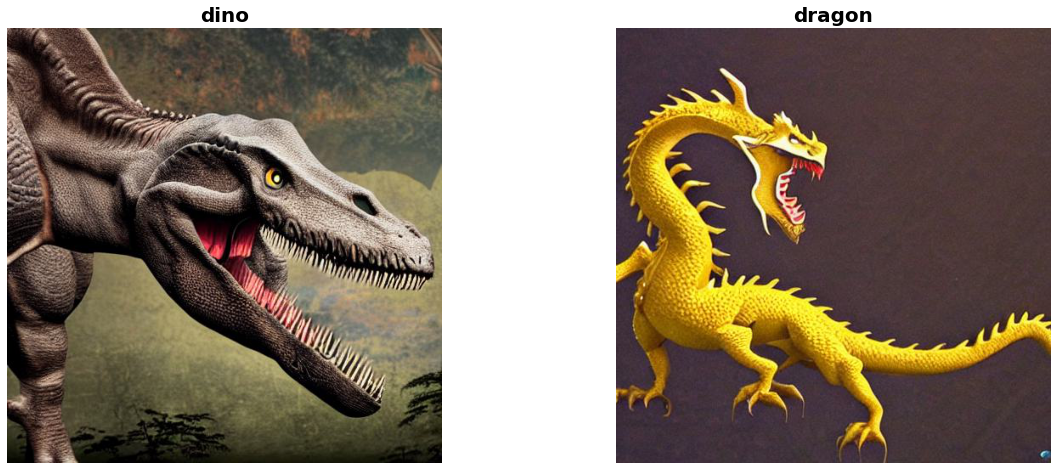

In [8]:
# Display images
display_random_image()

Now we have the idea how images look like, lets train the model next.

In [9]:
# Train the model for 10 epochs
epochs = 10
history = model.fit(train_ds,
                    epochs=epochs,
                    validation_data=val_ds)

2022-11-13 16:40:48.746385: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-11-13 16:40:51.336565: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


80/80 [==============================] - 35s 262ms/step - loss: 0.6443 - accuracy: 0.6230 - val_loss: 0.5190 - val_accuracy: 0.8198
Epoch 2/10
80/80 [==============================] - 11s 143ms/step - loss: 0.4967 - accuracy: 0.7735 - val_loss: 0.4677 - val_accuracy: 0.8071
Epoch 3/10
80/80 [==============================] - 12s 152ms/step - loss: 0.4097 - accuracy: 0.8375 - val_loss: 0.3831 - val_accuracy: 0.8477
Epoch 4/10
80/80 [==============================] - 12s 145ms/step - loss: 0.3605 - accuracy: 0.8551 - val_loss: 0.4373 - val_accuracy: 0.8020
Epoch 5/10
80/80 [==============================] - 12s 150ms/step - loss: 0.3289 - accuracy: 0.8545 - val_loss: 0.3481 - val_accuracy: 0.8452
Epoch 6/10
80/80 [==============================] - 11s 142ms/step - loss: 0.2915 - accuracy: 0.8877 - val_loss: 0.3225 - val_accuracy: 0.8655
Epoch 7/10
80/80 [==============================] - 11s 143ms/step - loss: 0.2446 - accuracy: 0.9097 - val_loss: 0.3258 - val_accuracy: 0.8452
Epoch 8/10

## Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20

In [10]:
# Calculate median of training accuracy
hist = history.history
train_acc_arr = np.array(hist['accuracy'])
train_acc_median = np.median(train_acc_arr)
print(f'Training accuracy median: {train_acc_median:.2f}')

Training accuracy median: 0.87


Based on the given options the closed value of the median is `0.90`.

## Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33

In [11]:
# Calculate std of training loss
train_loss_arr = np.array(hist['loss'])
train_loss_std = np.std(train_loss_arr)
print(f'Training loss std: {train_loss_std:.2f}')

Training loss std: 0.14


The closed option for the training loss standard deviation is `0.11`.

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- `rotation_range=40`,
- `width_shift_range=0.2`,
- `height_shift_range=0.2`,
- `shear_range=0.2`,
- `zoom_range=0.2`,
- `horizontal_flip=True`,
- `fill_mode='nearest`

In [12]:
# Train generator with data augmentation
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

# Load train images
aug_train_ds = train_gen.flow_from_directory(directory=train_dir,
                                             class_mode='binary',
                                             batch_size=20,
                                             shuffle=True,
                                             target_size=(150, 150),
                                             seed=42)

Found 1594 images belonging to 2 classes.


## Question 5

Let's train our model for 10 more epochs using the same code as previously. Make sure we don't re-create the model - we want to continue training the model we already started training.

What is the mean of validation loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97

In [13]:
# Train the model with augmented data for 10 epochs
final_epochs = epochs + 10
history = model.fit(aug_train_ds,
                    epochs=final_epochs,
                    validation_data=val_ds,
                    initial_epoch=history.epoch[-1]) # start from previous last epoch

Epoch 10/20
80/80 [==============================] - 20s 250ms/step - loss: 0.4508 - accuracy: 0.7974 - val_loss: 0.3914 - val_accuracy: 0.8122
Epoch 11/20
80/80 [==============================] - 19s 238ms/step - loss: 0.4279 - accuracy: 0.8099 - val_loss: 0.3032 - val_accuracy: 0.8579
Epoch 12/20
80/80 [==============================] - 19s 243ms/step - loss: 0.3862 - accuracy: 0.8212 - val_loss: 0.3227 - val_accuracy: 0.8579
Epoch 13/20
80/80 [==============================] - 19s 239ms/step - loss: 0.4193 - accuracy: 0.8112 - val_loss: 0.3768 - val_accuracy: 0.8350
Epoch 14/20
80/80 [==============================] - 19s 238ms/step - loss: 0.4033 - accuracy: 0.8174 - val_loss: 0.3404 - val_accuracy: 0.8528
Epoch 15/20
80/80 [==============================] - 19s 243ms/step - loss: 0.3735 - accuracy: 0.8394 - val_loss: 0.5128 - val_accuracy: 0.7919
Epoch 16/20
80/80 [==============================] - 19s 240ms/step - loss: 0.3914 - accuracy: 0.8269 - val_loss: 0.7372 - val_accuracy:

In [14]:
# Calculate the mean of validation loss
hist = history.history
val_loss_mean = np.mean(np.array(hist['val_loss']))
print(f'Validation loss mean: {val_loss_mean:.2f}')

Validation loss mean: 0.39


The closed option to our mean is `0.37`.

## Question 6

What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24

In [15]:
# Calculate the average of validation accuracy for last 5 epochs
last_5_val_acc = hist['val_accuracy'][6:]
last_5_val_acc_mean = np.mean(np.array(last_5_val_acc))
print(f'Average validation accuracy for last 5 epochs: {last_5_val_acc_mean:.2f}')

Average validation accuracy for last 5 epochs: 0.82


Average validation accuracy for last epochs is `0.84` based on the given options.